In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt


## Generacion de datos

In [12]:
np.random.seed(42)
n_samples = 200

enfermedades_data = {
    'nombre': ['COVID-19', 'Influenza', 'Gripa', 'Resfriado Común', 'Alergia', 'Neumonía', 'Bronquitis', 'Sinusitis'],
    'fiebre': [1, 1, 0, 0, 0, 1, 0, 0],
    'tos': [1, 1, 1, 1, 0, 1, 1, 0],
    'fatiga': [1, 1, 0, 0, 0, 1, 1, 0],
    'dolor_garganta': [0, 0, 1, 1, 0, 0, 0, 1],
    'perdida_olfato': [1, 0, 0, 0, 0, 0, 0, 1],
    'dificultad_respirar': [1, 0, 0, 0, 0, 1, 1, 0]
}

# Generar ejemplos aleatorios basados en estas enfermedades
def generar_muestra():
    idx = np.random.randint(0, len(enfermedades_data['nombre']))
    enfermedad = {key: enfermedades_data[key][idx] for key in enfermedades_data}
    return enfermedad

# Generar el DataFrame con 200 ejemplos
data = [generar_muestra() for _ in range(n_samples)]
df = pd.DataFrame(data)

df.head()


,nombre,fiebre,tos,fatiga,dolor_garganta,perdida_olfato,dificultad_respirar
0,Bronquitis,0,1,1,0,0,1
1,Resfriado Común,0,1,0,1,0,0
2,Alergia,0,0,0,0,0,0
3,Bronquitis,0,1,1,0,0,1
4,Gripa,0,1,0,1,0,0


In [4]:
X = df[['fiebre', 'tos', 'fatiga', 'dolor_garganta', 'perdida_olfato', 'dificultad_respirar']].values
y = df['nombre'].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42)

num_classes = len(label_encoder.classes_)
print(f"Número de clases: {num_classes}")


Número de clases: 8


In [6]:
# Construir el modelo con estocasticidad (Dropout)
model = Sequential()
model.add(Dense(12, input_dim=6, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(8, activation='relu'))  
model.add(Dense(num_classes, activation='softmax'))  # Capa de salida

# Compilar el modelo
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Mostrar el resumen del modelo
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 12)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │            72 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260 (1.02 KB)

 Trainable params: 260 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

## Entrenamiento

In [7]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nPrecisión en el conjunto de prueba: {accuracy * 100:.2f}%")



Precisión en el conjunto de prueba: 76.00%


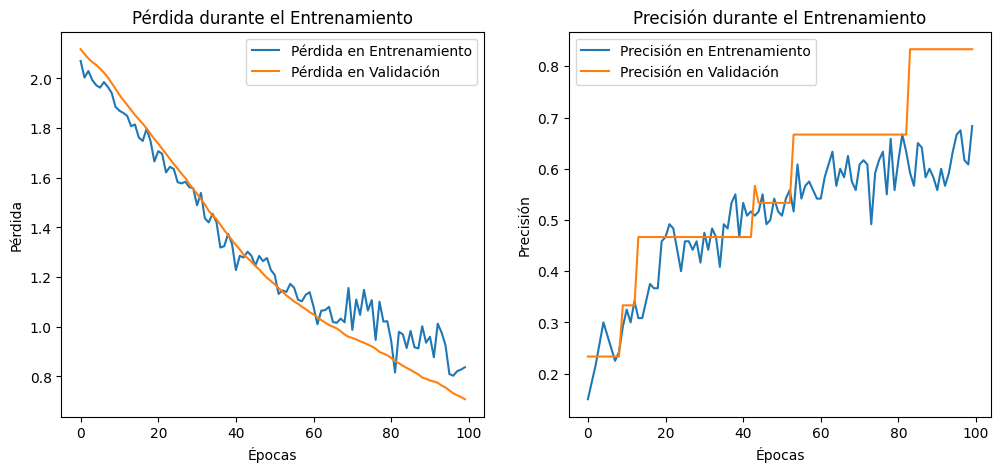

In [9]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en Validación')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión en Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en Validación')
plt.title('Precisión durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()


## Predicciones

In [11]:
# Función para predecir enfermedad
def predecir_enfermedad(fiebre, tos, fatiga, dolor_garganta, perdida_olfato, dificultad_respirar):
    sintomas = np.array([[fiebre, tos, fatiga, dolor_garganta, perdida_olfato, dificultad_respirar]])
    prediccion = model.predict(sintomas)
    clase_predicha = label_encoder.inverse_transform([prediccion.argmax()])[0]
    return clase_predicha

nuevo_paciente = {
    'fiebre': 1,
    'tos': 0,
    'fatiga': 0,
    'dolor_garganta': 1,
    'perdida_olfato': 0,
    'dificultad_respirar': 0
}

enfermedad = predecir_enfermedad(**nuevo_paciente)
print(f"\nLa enfermedad predicha para el nuevo paciente es: {enfermedad}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

La enfermedad predicha para el nuevo paciente es: Sinusitis
